In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Dataset.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df=df[['Restaurant Name', 'Cuisines', 'Average Cost for two', 'Aggregate rating','Price range']]

In [11]:
df.dropna(subset=['Cuisines'], inplace=True)

<Axes: xlabel='Aggregate rating', ylabel='count'>

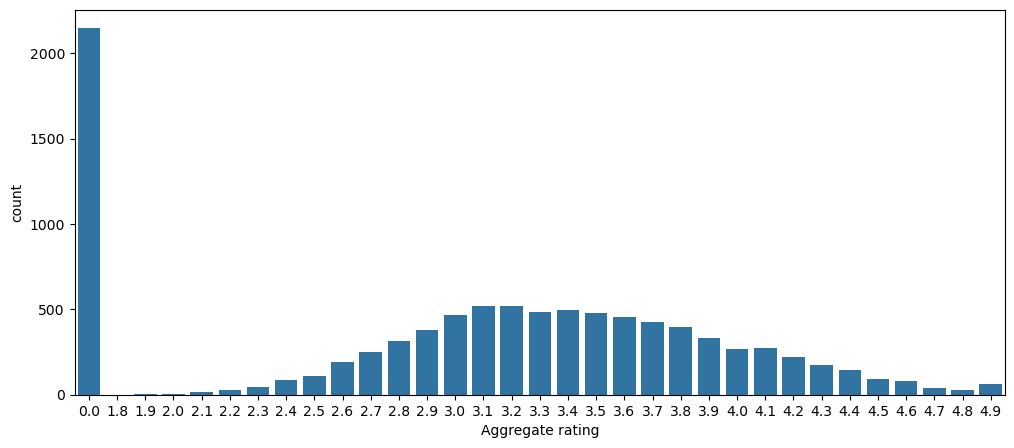

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x='Aggregate rating',data=df)

<Axes: xlabel='Aggregate rating'>

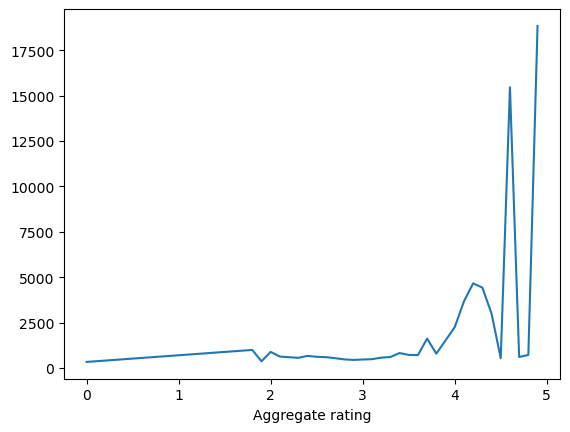

In [13]:
df.groupby('Aggregate rating')['Average Cost for two'].mean().plot()

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

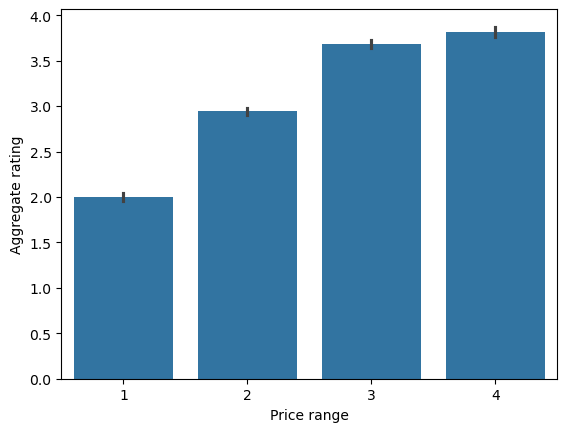

In [14]:
sns.barplot(x='Price range',y='Aggregate rating',data=df)

In [15]:
df.drop_duplicates(subset='Restaurant Name', inplace=True)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
df['content'] = (df['Cuisines']+' '+df['Price range'].astype(str)+' ' +df['Aggregate rating'].astype(str)+' '+df['Average Cost for two'].astype(str))

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
vectorizer=TfidfVectorizer()
tfidf_matrix=vectorizer.fit_transform(df['content'])
text_similarity=cosine_similarity(tfidf_matrix)
scaler=MinMaxScaler()
df['avg_cost_scaled'] = scaler.fit_transform(df[['Average Cost for two']])
cost_similarity=cosine_similarity(df[['avg_cost_scaled']])
combined_similarity=0.8 * text_similarity + 0.2 * cost_similarity

In [20]:
def recommend_restaurants(user_index, top_n=5):
    sim_scores = list(enumerate(combined_similarity[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    recommended_indices = [i[0] for i in sim_scores]
    return df.iloc[recommended_indices][['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Price range', 'Average Cost for two']]

In [21]:
user_index = 10
print("User Preference Example:")
print(df.iloc[user_index][['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Price range', 'Average Cost for two']])
print("\nRecommended Restaurants:")
print(recommend_restaurants(user_index))

User Preference Example:
Restaurant Name          Silantro Fil-Mex
Cuisines                Filipino, Mexican
Aggregate rating                      4.9
Price range                             3
Average Cost for two                  800
Name: 10, dtype: object

Recommended Restaurants:
                     Restaurant Name  \
15                     Cafe Arabelle   
13                        Guevarra's   
17                        Balay Dako   
9                           Locavore   
2357  Calzone- Dine & Rooftop Lounge   

                                         Cuisines  Aggregate rating  \
15              Cafe, American, Italian, Filipino               3.6   
13                                       Filipino               4.2   
17                                       Filipino               4.5   
9                                        Filipino               4.8   
2357  Continental, Mexican, North Indian, Chinese               3.7   

      Price range  Average Cost for two  
15   

In this task, I developed a content-based restaurant recommendation system aimed at suggesting similar restaurants based on user preferences. The approach involved preprocessing the dataset by handling missing values and encoding relevant features such as Cuisines, Price range, and Aggregate rating.
I created a combined textual feature by merging these attributes, which was then transformed into numerical vectors using the TF-IDF technique. Cosine similarity was used to calculate the likeness between restaurants based on this feature vector.
A recommendation function was implemented to retrieve the most similar restaurants for a given input restaurant, excluding itself.

When tested, the system successfully recommended restaurants that closely matched the user's preference in terms of cuisine, price level, and ratings. This approach demonstrated how content-based filtering can effectively suggest options even in the absence of extensive user-specific data, relying instead on the attributes of the items themselves.